In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [67]:
cvd=pd.read_csv(r"C:\Users\lenovo\Desktop\final year project\cvd-prediction-main\10dataset.csv")

In [68]:
cvd.head()

,id,age,gender,height,weight,ap_hi,ap_la,chol,gluc,smoke,alco,active,target
0,10521,56,1,168,66.0,120,80,1,1,0,0,1,0
1,10523,57,2,162,75.0,140,90,1,1,0,0,1,0
2,10524,58,2,173,75.0,120,80,1,1,0,0,0,1
3,10525,48,1,162,100.0,130,90,1,1,0,0,1,1
4,10530,54,1,165,76.0,120,80,1,1,0,0,0,0


In [69]:
print('The dimensions are',cvd.shape)

The dimensions are (2617, 13)


In [70]:
cvd.isnull().any

<bound method DataFrame.any of          id    age  gender  height  weight  ap_hi  ap_la   chol   gluc  smoke  \
0     False  False   False   False   False  False  False  False  False  False   
1     False  False   False   False   False  False  False  False  False  False   
2     False  False   False   False   False  False  False  False  False  False   
3     False  False   False   False   False  False  False  False  False  False   
4     False  False   False   False   False  False  False  False  False  False   
...     ...    ...     ...     ...     ...    ...    ...    ...    ...    ...   
2612  False  False   False   False   False  False  False  False  False  False   
2613  False  False   False   False   False  False  False  False  False  False   
2614  False  False   False   False   False  False  False  False  False  False   
2615  False  False   False   False   False  False  False  False  False  False   
2616  False  False   False   False   False  False  False  False  False  False 

In [71]:
print(cvd.groupby('age').size())

age
39     15
40    112
41     30
42     76
43     32
44    110
45     29
46    111
47     35
48    115
49     40
50    207
51     47
52    198
53     44
54    220
55     58
56    201
57     45
58    238
59     50
60    230
61     45
62    139
63     49
64    131
65     10
dtype: int64


<AxesSubplot:xlabel='age', ylabel='count'>

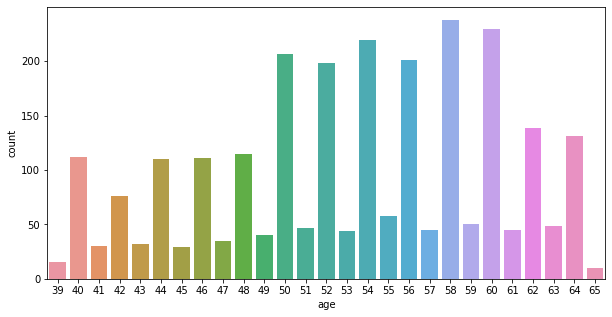

In [72]:
fig=plt.figure(figsize=(10,5))
sns.countplot(cvd['age'],label="count")

In [73]:
print(cvd.groupby('gender').size())

gender
1    1747
2     870
dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

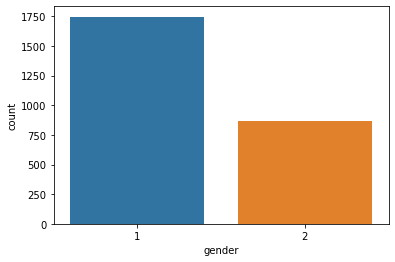

In [74]:
sns.countplot(cvd['gender'],label="count")

In [75]:
print(cvd.groupby('height').size())

height
70       1
97       1
119      1
120      2
130      1
137      1
142      1
143      1
144      1
145      8
146      7
147     15
148     12
149     14
150     46
151     31
152     47
153     47
154     48
155     72
156    105
157     64
158    136
159     74
160    197
161     70
162    117
163     83
164    126
165    231
166     75
167     93
168    154
169    115
170    182
171     37
172     48
173     35
174     62
175     58
176     49
177     19
178     43
179     12
180     33
181      8
182     12
183      3
184      5
185      5
186      4
188      2
190      1
192      1
198      1
dtype: int64


<AxesSubplot:xlabel='height', ylabel='count'>

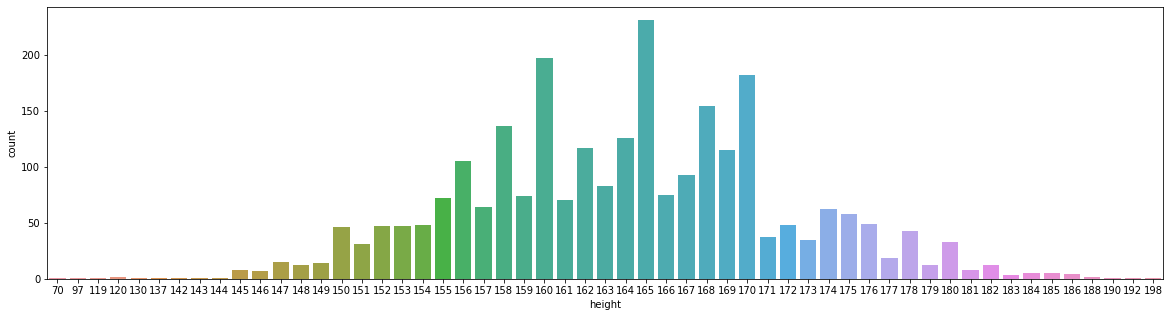

In [76]:
fig=plt.figure(figsize=(20,5))
sns.countplot(cvd['height'],label="count")

In [77]:
print(cvd.groupby('weight').size())

weight
40.0     4
41.0     1
42.0     3
43.0     3
44.0     2
        ..
140.0    2
146.0    1
154.0    1
165.0    1
170.0    1
Length: 102, dtype: int64


<AxesSubplot:xlabel='weight', ylabel='count'>

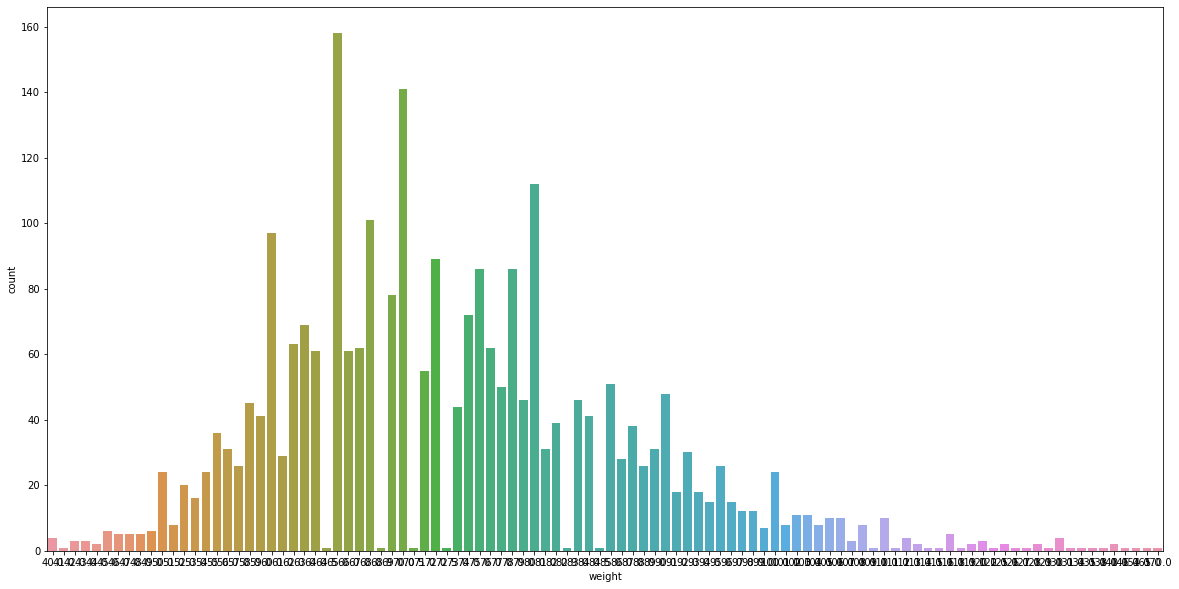

In [78]:
fig=plt.figure(figsize=(20,10))
sns.countplot(cvd['weight'],label="count")

In [79]:
print(cvd.groupby('ap_hi').size())

ap_hi
1           1
12          2
13          1
15          2
16          1
17          1
80          5
85          1
90         36
95          3
100        96
102         1
105         3
107         1
108         1
109         1
110       319
115        10
118         1
119         2
120      1043
125        19
126         1
127         1
128         1
130       345
132         2
134         1
135         9
136         1
139         1
140       334
141         1
143         1
144         1
145        11
146         1
147         2
148         1
150       162
151         1
155         3
158         1
160       116
165         3
168         1
170        27
175         1
180        26
190         4
200         4
210         1
701         1
1420        1
11500       1
dtype: int64


<AxesSubplot:xlabel='ap_hi', ylabel='count'>

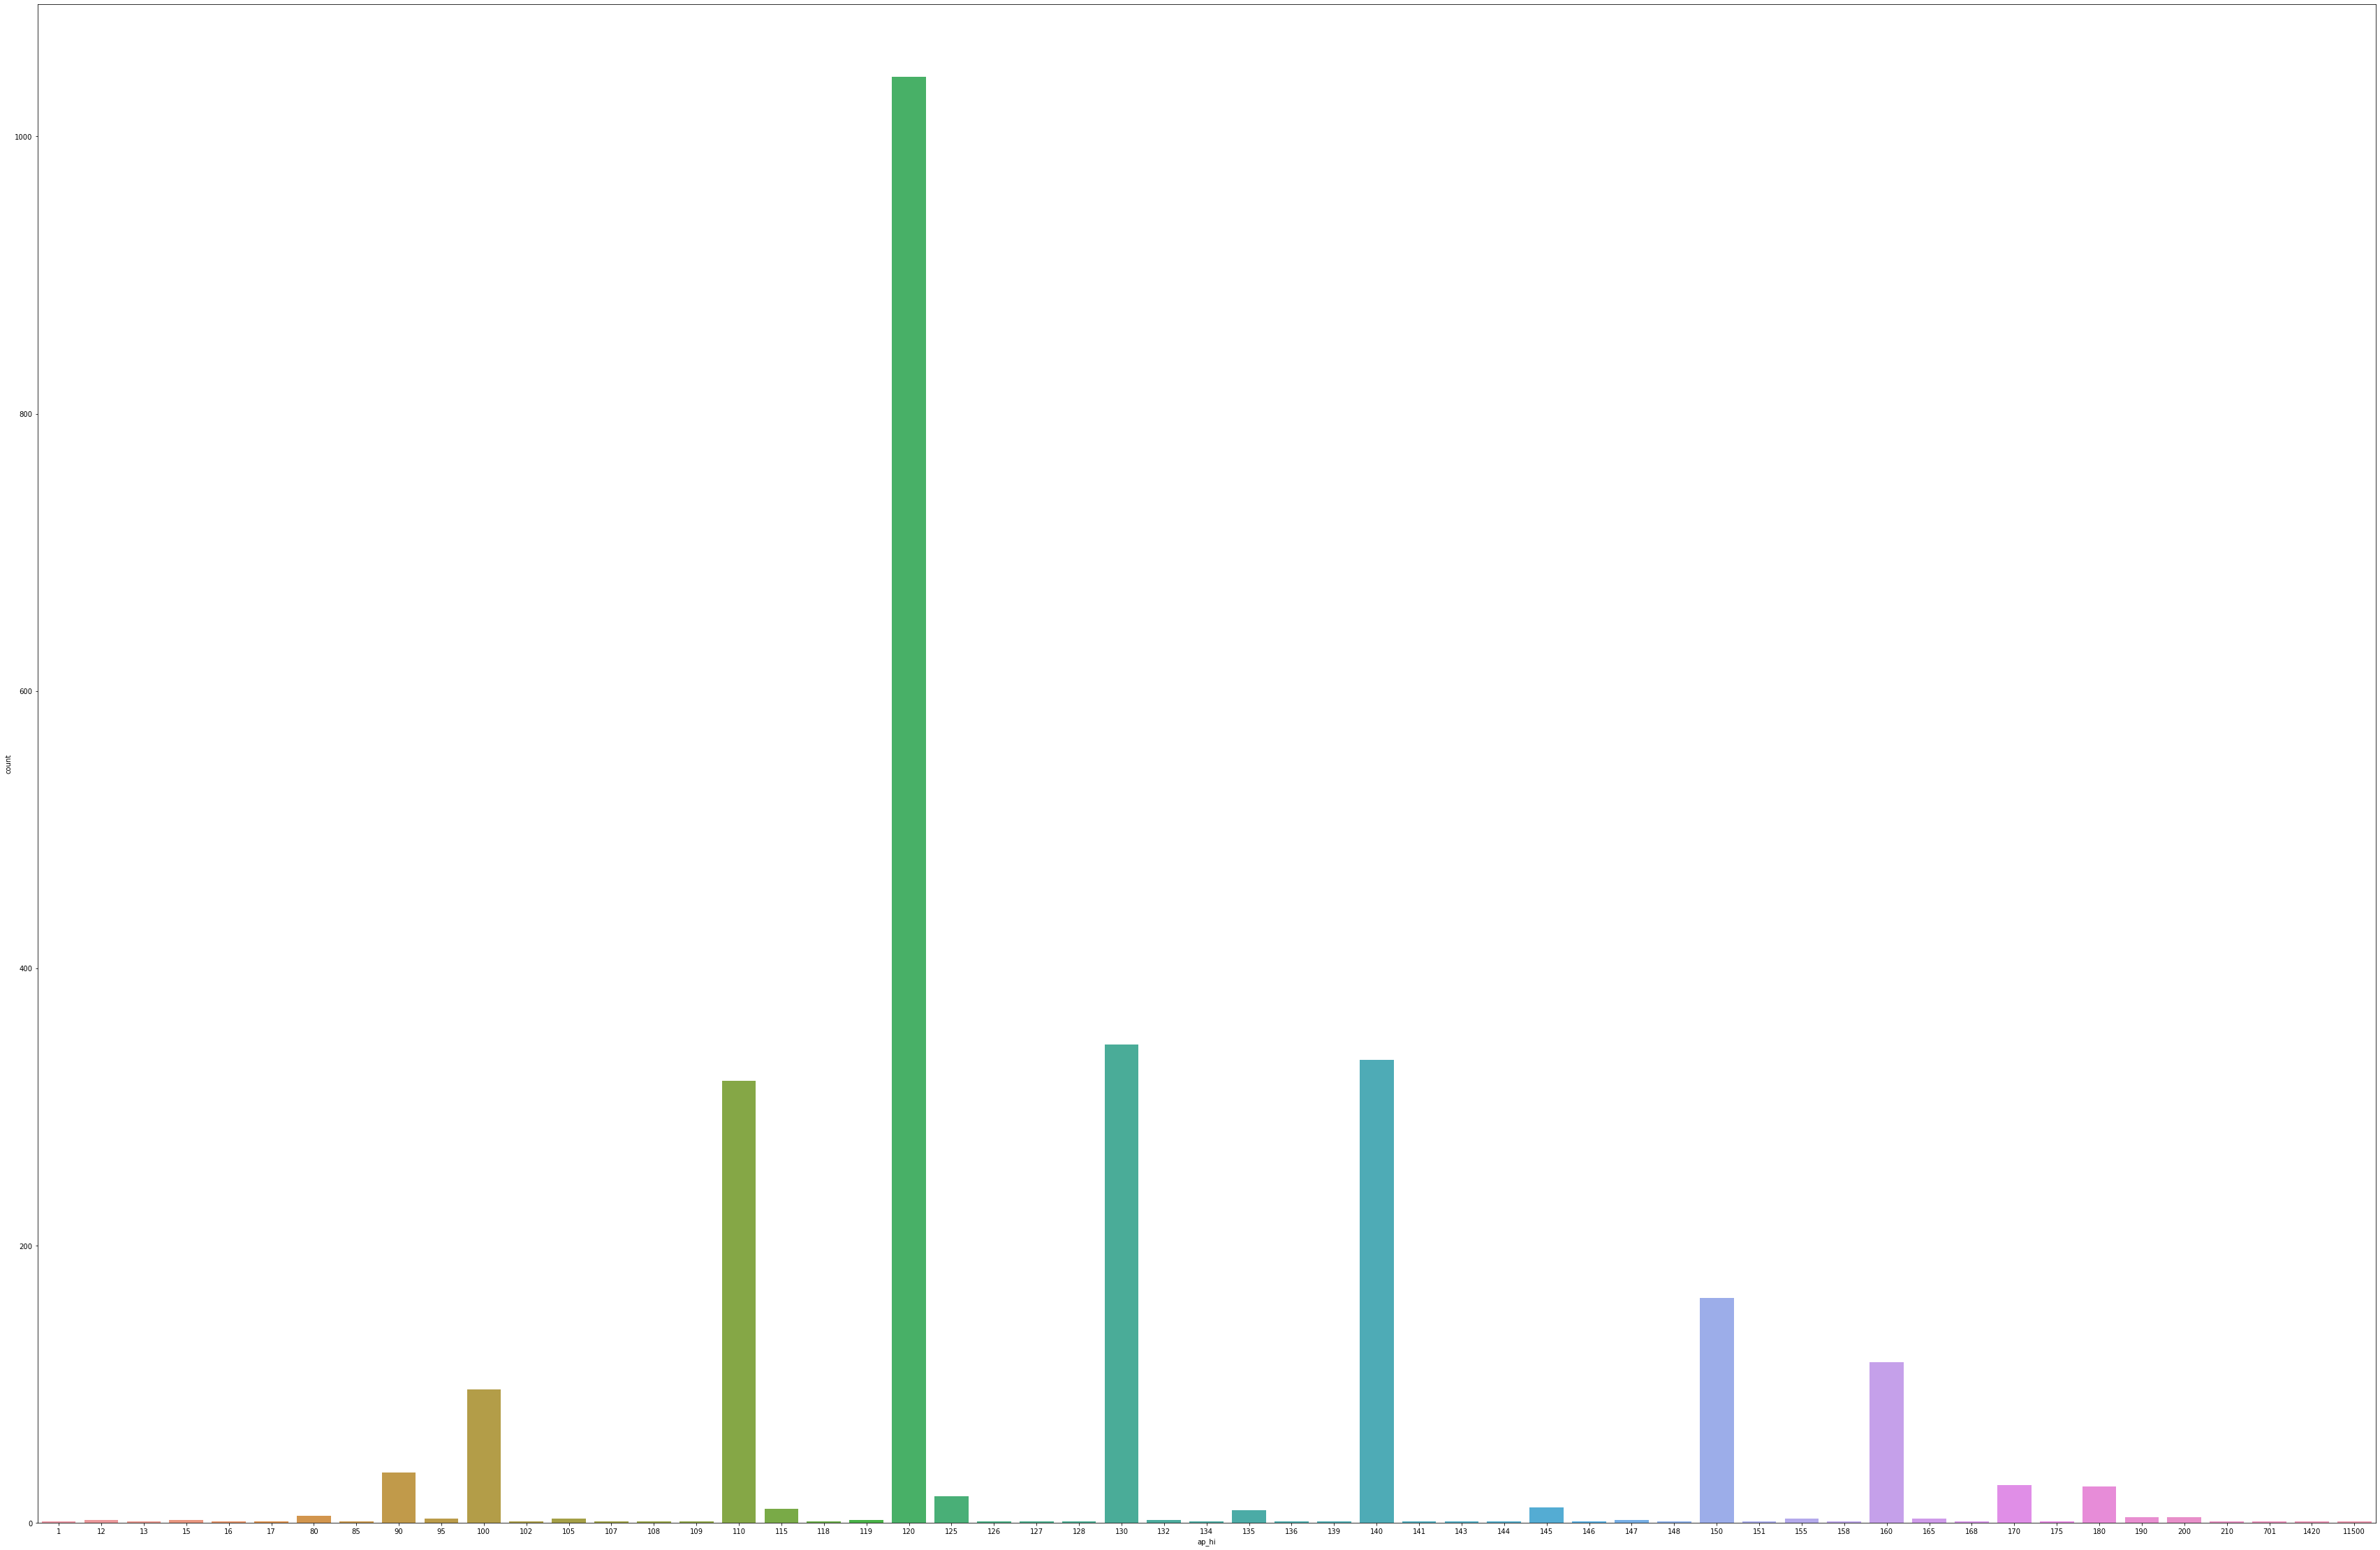

In [80]:
fig=plt.figure(figsize=(60,40))
sns.countplot(cvd['ap_hi'],label="count")

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_la'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

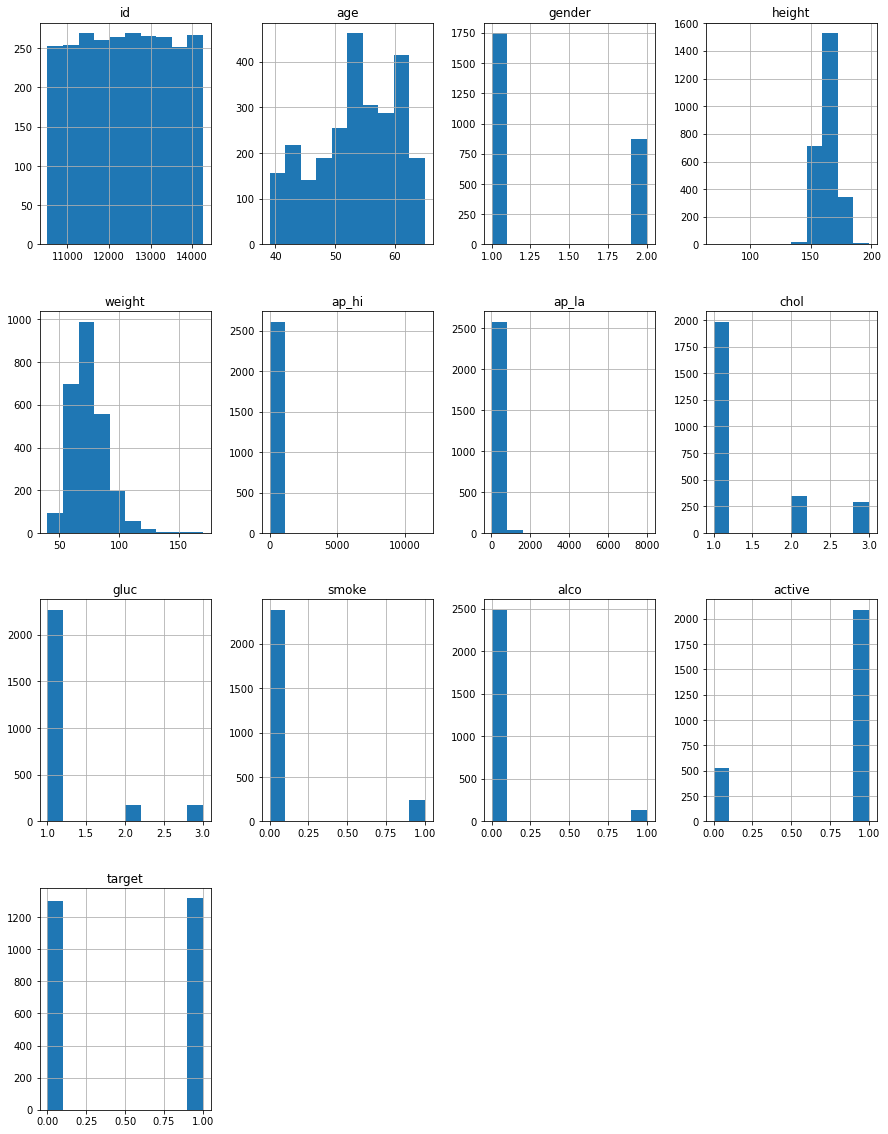

In [81]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
cvd.hist(ax=ax)

<AxesSubplot:>

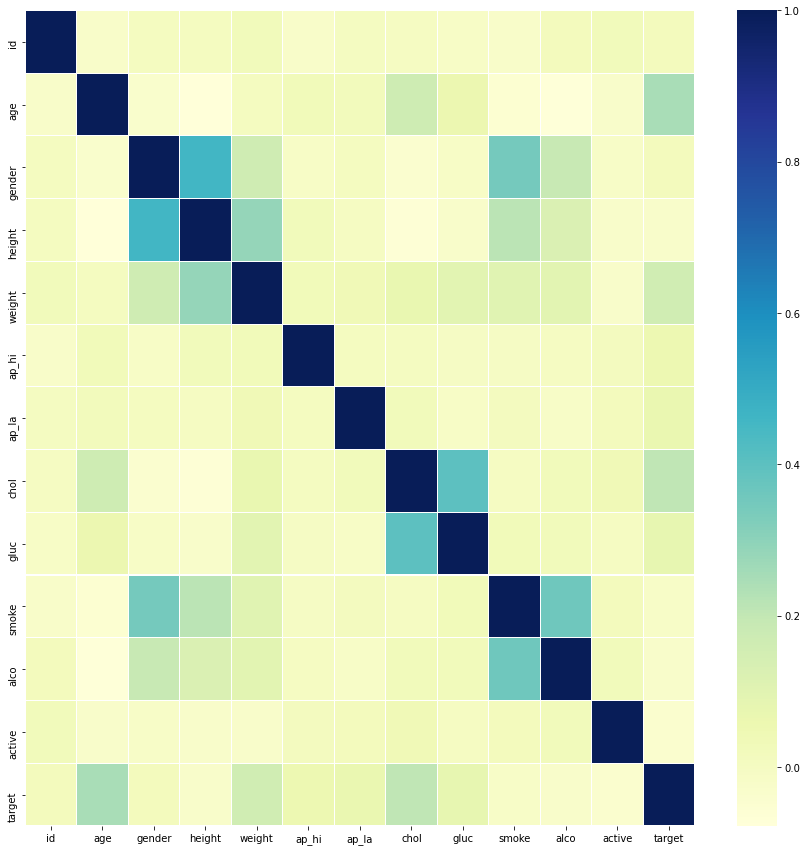

In [82]:
corrmat = cvd.corr()
f, ax = plt.subplots(figsize =(15, 15))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# SPLITTING THE DATA SET

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cvd.loc[:, cvd.columns != 'target'], cvd['target'], stratify=cvd['target'], random_state=66)

# KNN Algorithm

In [34]:
y = cvd['target']
X = cvd.drop(['target'], axis = 1)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [38]:
score.mean()

0.46351963967125853

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.707
Test set score: 0.704


In [40]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.708
Test set accuracy: 0.695


In [41]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.708
Test set accuracy: 0.695


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.646


In [43]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.731
Accuracy on test set: 0.728


In [44]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.01430761 0.11733125 0.         0.01127597 0.         0.81511772
 0.01379149 0.02817595 0.         0.         0.         0.        ]


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.715


In [47]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.731
Accuracy on test set: 0.734


In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on test set: 0.687


In [49]:
X_test

,id,age,gender,height,weight,ap_hi,ap_la,cholesterol,gluc,smoke,alco,active
1810,13100,46,2,168,89.0,140,90,1,1,0,0,1
349,11035,64,1,156,62.0,120,80,1,1,0,0,1
1786,13068,62,1,157,82.0,140,90,1,1,0,0,0
1303,12392,55,1,162,63.0,110,70,1,1,0,0,1
177,10784,60,1,157,55.0,110,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
178,10785,63,1,158,58.0,145,90,1,2,0,0,1
1854,13158,52,2,163,61.0,120,70,1,1,0,0,0
1485,12645,62,1,160,87.0,140,90,3,3,0,0,1
80,10640,62,2,172,74.0,150,90,1,1,1,1,1


In [50]:
y_pred = classifier.predict(X_test)

In [51]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [52]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

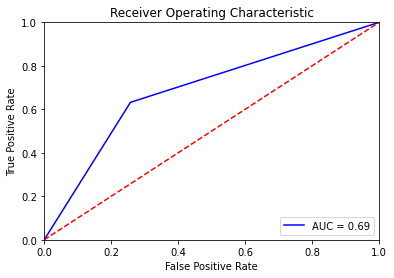

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machine

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.50
Accuracy on test set: 0.50


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.66
Accuracy on test set: 0.64


In [57]:
X_test

,id,age,gender,height,weight,ap_hi,ap_la,cholesterol,gluc,smoke,alco,active
1810,13100,46,2,168,89.0,140,90,1,1,0,0,1
349,11035,64,1,156,62.0,120,80,1,1,0,0,1
1786,13068,62,1,157,82.0,140,90,1,1,0,0,0
1303,12392,55,1,162,63.0,110,70,1,1,0,0,1
177,10784,60,1,157,55.0,110,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
178,10785,63,1,158,58.0,145,90,1,2,0,0,1
1854,13158,52,2,163,61.0,120,70,1,1,0,0,0
1485,12645,62,1,160,87.0,140,90,3,3,0,0,1
80,10640,62,2,172,74.0,150,90,1,1,1,1,1


In [58]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

# REAL TIME PREDICTION OF CVD

In [60]:
new_input = [[1,55,1,156,85,140,90,3,1,0,0,1]]
# get prediction for new input
new_output = classifier.predict(new_input)
# summarize input and output
print(new_output);
if (new_output == 0):
 print("THE PATIENT DOES NOT HAVE 'CARDIOVASCULAR DISEASES'")  
else :
 print("THE PATIENT HAS 'CARDIOVASCULAR DISEASES'")

[1]
THE PATIENT HAS 'CARDIOVASCULAR DISEASES'
